In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [121]:
weather2 = pd.read_csv('Rain1.csv')
weather3 = pd.read_csv('Prediction.csv')
weather1 = weather2.drop(columns=['Dates','Actual'])
weather2

,Dates,Temp,Humidity,Actual,Normal
0,10-Jan,14.34,3.91,3.48,19.9
1,10-Feb,17.90,5.19,15.82,18.6
2,10-Mar,26.63,4.39,0.00,15.5
3,10-Apr,33.34,4.21,0.15,12.7
4,10-May,36.77,5.98,3.82,20.8
...,...,...,...,...,...
151,22-Aug,31.10,18.49,57.76,244.2
152,22-Sep,29.67,17.64,160.64,128.3
153,22-Oct,23.54,13.31,99.20,25.9
154,22-Nov,18.45,9.16,0.00,5.3


In [122]:
X = weather1.iloc[:, :-1]
Y = weather1.iloc[:, -1]

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [124]:
X_train.shape

(109, 2)

In [125]:
Y_train.shape

(109,)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [127]:
# Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor,plot_tree
reg = DecisionTreeRegressor()

In [128]:
# criterion="squared_error", max_depth=10, min_samples_split=10, random_state = 10

In [129]:
reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [130]:
Y_pred = reg.predict(X_test)

Y_pred2 = np.array([40,67.21428571, 128.22      , 114.925     ,
        86.86666667,  86.86666667,  86.86666667,  42.66666667,
        21.65      , 28     ,  28       ,  86.86666667])
Y_pred

array([ 18.6,  20.8,  59.9, 244.2,  12.7, 244.2,   5.3, 234.7,  59.9,
        18.6, 128.3,  20.8, 244.2,   5.3,  59.9,  12.7,   5.3, 244.2,
        25.9,  25.9,   8.2,  12.7,  18.6, 244.2,  19.9,   5.3, 234.7,
        20.8, 244.2, 128.3,  19.9, 244.2, 128.3, 244.2,  25.9, 234.7,
       244.2,  20.8,   5.3,   5.3, 244.2,  20.8,  12.7,  59.9,   8.2,
        59.9,  12.7])

In [131]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

1123.5827659574466

In [132]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

33.5198861268568

In [133]:
reg.score(X_test,Y_test)

0.8616513364087246

In [134]:
r2_score(Y_pred, Y_test)

0.8844996328010639

In [135]:
mean_absolute_error(Y_pred, Y_test)

11.678723404255319

In [136]:
from sklearn.metrics import r2_score
Y_test_mean = np.full(len(Y_test), Y_test.mean())
Y_test.mean()

84.59148936170214

In [138]:
def MAPE (A , P):
    # A = weather.Train
    # p = Y_pred2
    MAPE = np.mean(np.abs((A - P)/ A)) * 100

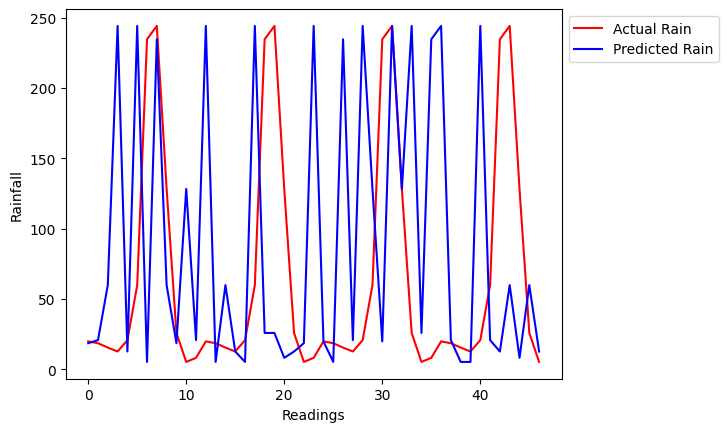

In [139]:
plt.plot(weather3.Plot,'r-' , label='Actual Rain')
plt.plot(Y_pred,'b-', label='Predicted Rain')
plt.xlabel('Readings')
plt.ylabel('Rainfall')
plt.legend(bbox_to_anchor = (1.0,1.0))

In [140]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor,VotingClassifier

In [141]:
rfr = RandomForestRegressor()

In [142]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [143]:
Y1_pred = rfr.predict(X_test)

In [144]:
mean_squared_error(Y1_pred, Y_test)

922.3583153191503

In [145]:
np.sqrt(mean_squared_error(Y_test, Y1_pred))

30.370352571531836

In [146]:
mean_absolute_error(Y1_pred, Y_test)

14.875574468085073

In [147]:
r2_score(Y1_pred, Y_test)

0.8883564561176563

In [148]:
Y1_pred

array([ 17.157,  20.152,  97.216, 243.041,  16.073, 205.174,  13.453,
       235.08 ,  57.605,  17.424, 150.226,  37.383, 243.041,  18.183,
        56.483,  17.174,  12.9  , 218.626,  24.88 ,  24.776,  12.945,
        16.071,  18.243, 240.552,  17.464,  18.417, 236.41 ,  24.09 ,
       149.679, 136.318,  18.847, 216.403, 110.862, 242.015,  15.5  ,
       234.282, 239.564,  28.296,   8.032,  14.298, 216.403,  20.268,
        20.611,  56.432,   9.708,  57.605,  15.124])

In [149]:
Y_pred3 = np.array([35,65,111,118,100.841, 102.383, 103.129, 80, 75,62, 51,52])
Y_pred3

array([ 35.   ,  65.   , 111.   , 118.   , 100.841, 102.383, 103.129,
        80.   ,  75.   ,  62.   ,  51.   ,  52.   ])

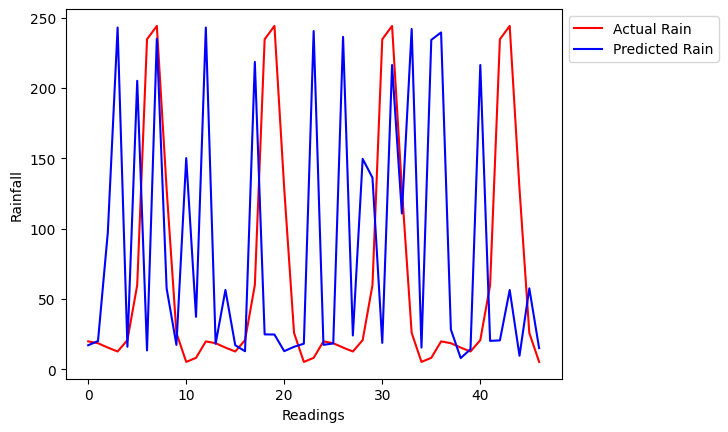

In [150]:
plt.plot(weather3.Plot,'r-' , label='Actual Rain')
plt.plot(Y1_pred,'b-', label='Predicted Rain')
plt.xlabel('Readings')
plt.ylabel('Rainfall')
plt.legend(bbox_to_anchor = (1.0,1.0))

In [151]:
from sklearn.svm import SVR

In [152]:
model = SVR()
model.fit(X_train, Y_train)
Y2_pred = model.predict(X_test)

In [153]:
Y2_pred

array([18.33740892, 22.79815748, 38.86423877, 43.50150526, 16.66959267,
       41.92896354, 18.85399977, 44.09201709, 36.02353712, 17.32463528,
       41.22616571, 31.93768211, 43.76208729, 17.3594879 , 31.53669279,
       23.60609826, 16.62084659, 41.78892776, 22.08898671, 21.63050319,
       18.95930138, 17.11426396, 17.40955386, 43.15122222, 20.37774737,
       20.0326894 , 43.43407007, 26.30332643, 40.1895842 , 39.26025644,
       19.74477863, 40.52044387, 37.00944517, 44.34795724, 20.28177698,
       42.91285261, 43.03915021, 28.03268958, 16.46267374, 17.33323542,
       40.95397273, 23.40121012, 26.18611561, 30.65958003, 18.80451498,
       36.23526614, 20.29452231])

In [154]:
mean_squared_error(Y2_pred, Y_test)

9582.773167543526

In [155]:
np.sqrt(mean_squared_error(Y_test, Y2_pred))

97.89163992672472

In [156]:
model.score(X_train, Y_train)

0.03733360074056313

In [157]:
r2_score(Y2_pred, Y_test)

-86.85105788975433

In [158]:
mean_absolute_error(Y2_pred, Y_test)

61.236081349837924

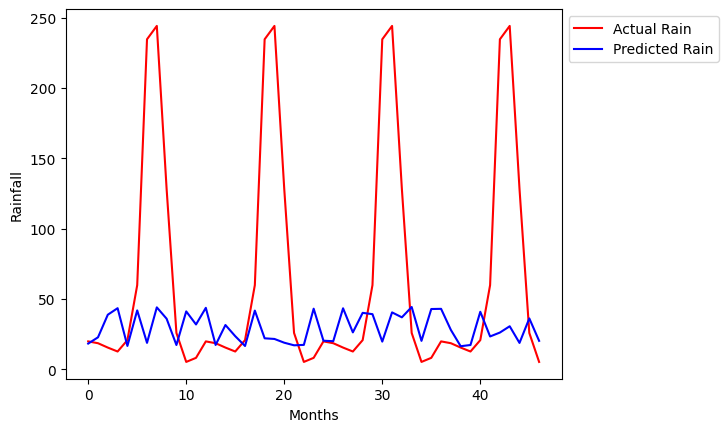

In [159]:
plt.plot(weather3.Plot,'r-' , label='Actual Rain')
plt.plot(Y2_pred,'b-', label='Predicted Rain')
plt.xlabel('Months')
plt.ylabel('Rainfall')
plt.legend(bbox_to_anchor = (1.0,1.0))

In [160]:
from xgboost import XGBRegressor

Xg_reg= XGBRegressor()

Xg_reg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [161]:
Y3_pred = Xg_reg.predict(X_test)
Y3_pred

array([ 17.758358 ,  20.603754 ,  59.901848 , 244.20026  ,  20.085155 ,
       235.35623  ,  18.485157 , 234.70036  ,  59.868378 ,  22.569687 ,
       202.15874  ,  24.456585 , 244.20026  ,  18.49588  ,  59.884354 ,
        13.111134 ,  15.6196165, 170.37851  ,  25.895958 ,  25.90725  ,
        11.460403 ,  12.4765415,  18.2231   , 244.2018   ,  19.269913 ,
        20.69766  , 243.07068  ,  21.441303 ,  59.9029   , 128.29955  ,
        19.828613 , 170.41342  , 128.29648  , 244.18831  ,  13.578564 ,
       234.82838  , 170.37726  ,  23.798162 ,   5.0292325,  18.169374 ,
       170.37851  ,  20.55313  ,  17.953428 ,  59.900803 ,  12.365803 ,
        59.868378 ,  17.92068  ], dtype=float32)

In [162]:
mean_squared_error(Y3_pred, Y_test)

1251.3900313643758

In [163]:
np.sqrt(mean_squared_error(Y_test, Y3_pred))

35.374991609389475

In [164]:
r2_score(Y3_pred, Y_test)

0.8367691293156778

In [165]:
mean_absolute_error(Y3_pred, Y_test)

14.438079860362597

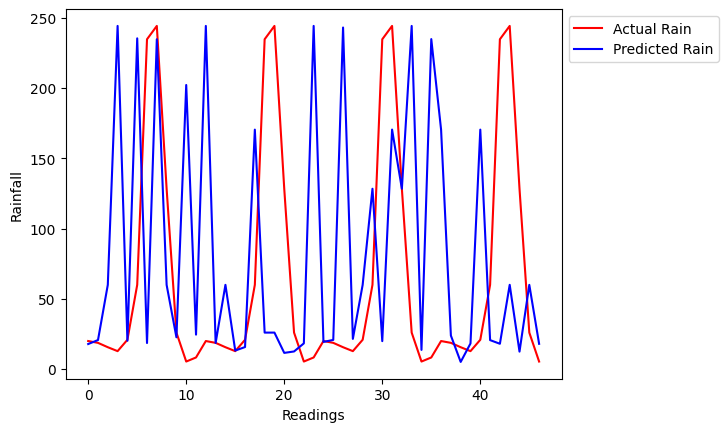

In [166]:
plt.plot(weather3.Plot,'r-' , label='Actual Rain')
plt.plot(Y3_pred,'b-', label='Predicted Rain')
plt.xlabel('Readings')
plt.ylabel('Rainfall')
plt.legend(bbox_to_anchor = (1.0,1.0))

In [167]:
weather4 = pd.read_csv('Method Comparision.csv')
weather4

,Model,MSE,RMSE,MAE,R2Score
0,SVR,706.00390,83.70187,47.340203,0.497689
1,Decision Tree,66.08460,8.12924,12.334040,0.986815
2,XGBoost,460.91784,21.46890,8.811132,0.933215
3,Random Forest,111.67308,10.56754,11.460850,0.977001


Text(0.5, 1.0, 'Mean Absolute Error')

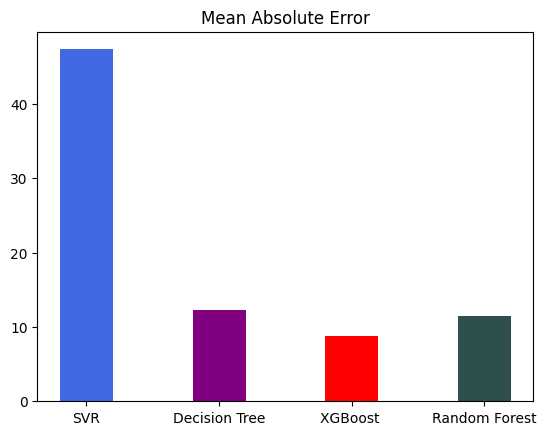

In [168]:
fig,ax = plt.subplots()
ax.bar (weather4.Model, weather4.MAE, color = color, width = 0.4)
color = ['royalblue','purple','red','darkslategray']
ax.set_title('Mean Absolute Error')
# ax.y_lable('')

Text(0.5, 1.0, 'Root Mean Squared Error')

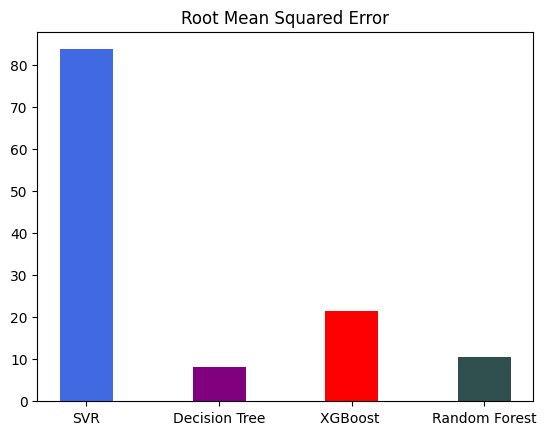

In [169]:
fig,ax = plt.subplots()
ax.bar (weather4.Model, weather4.RMSE, color = color, width = 0.4)
color = ['royalblue','purple','red','darkslategray']
ax.set_title('Root Mean Squared Error')
# ax.y_lable('')

Text(0.5, 1.0, 'Mean Squared Error')

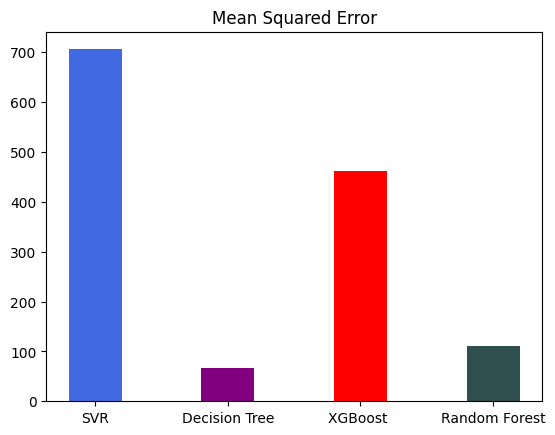

In [77]:
fig,ax = plt.subplots()
ax.bar (weather4.Model, weather4.MSE, color = color, width = 0.4)
color = ['royalblue','purple','red','darkslategray']
ax.set_title('Mean Squared Error')
# ax.y_lable('')

Text(0.5, 1.0, 'R2 Score')

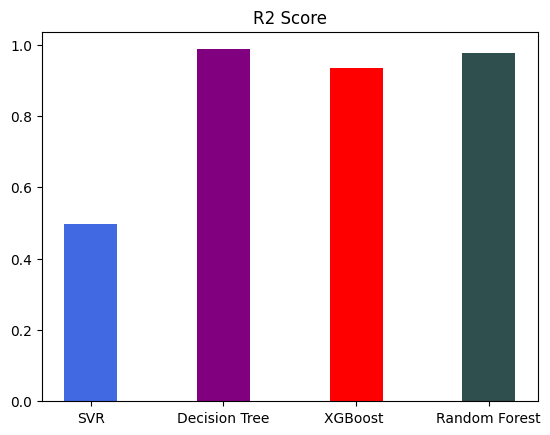

In [116]:
fig,ax = plt.subplots()
color = ['royalblue','purple','red','darkslategray']
ax.bar (weather4.Model, weather4.R2Score, color = color, width = 0.4)
ax.set_title('R2 Score')
# ax.y_lable('')

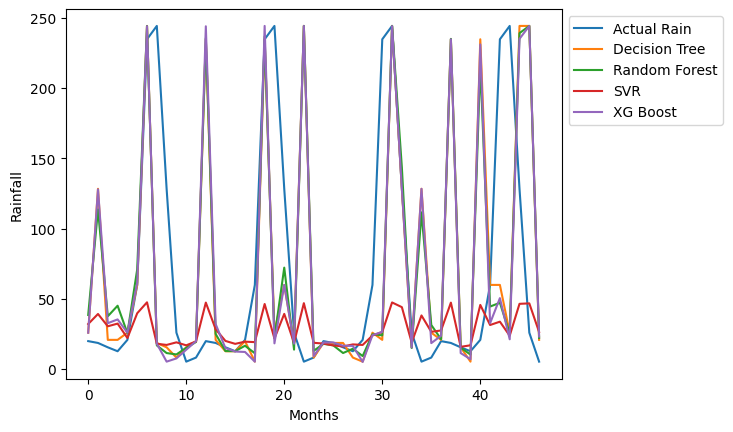

In [108]:
plt.plot(weather.Plot, label='Actual Rain')
plt.plot(Y_pred, label='Decision Tree')
plt.plot(Y1_pred, label='Random Forest')
plt.plot(Y2_pred, label='SVR')
plt.plot(Y3_pred, label='XG Boost')
plt.xlabel('Months')
plt.ylabel('Rainfall')
plt.legend(bbox_to_anchor = (1.0,1.0))